# Problem Statement

Driver recruitment and retention are critical challenges for Ola, with high churn rates making it easy for drivers to switch to competitors like Uber. This high turnover not only affects organizational morale but also increases costs, as acquiring new drivers is more expensive than retaining existing ones. To mitigate this, Ola has expanded its recruitment pool to include individuals without cars, though this approach is costly.

As a data Analyst in Ola's Analytics Department, your task is to analyze monthly data from 2019 and 2020, focusing on driver attributes, and predict whether a driver is likely to leave the company. The goal is to develop insights and predictive models that can help reduce driver attrition and optimize retention strategies.

# Import Required Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data in dataset

In [4]:
data =  pd.read_csv('/content/ola_driver.csv')

**# Check Dataset and Apply some Basic Function**

In [5]:
pd.set_option("display.max_rows",50)
pd.set_option("display.max_columns",50)
# These Function use to show at a time show 50 rows and 50 columns data

In [6]:
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


#1.	Data Structure and Overview:

Question- What is the structure of the dataset (number of rows and columns)?

In [7]:
data.shape

(19104, 14)

Question- What are the data types of each column?

In [8]:
data.dtypes

,0
Unnamed: 0,int64
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object


Question- Are there any missing values in the dataset? If so, which columns are affected?

In [9]:
data.isna().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


# 2.	Descriptive Statistics:


Question- What are the basic statistics (mean, median, standard deviation) for numerical features like Age, Income, Total Business Value, and Quarterly Rating?

In [10]:
data[['Age','Income','Total Business Value','Quarterly Rating']].describe([])

,Age,Income,Total Business Value,Quarterly Rating
count,19043.000000,19104.000000,1.910400e+04,19104.000000
mean,34.668435,65652.025126,5.716621e+05,2.008899
std,6.257912,30914.515344,1.128312e+06,1.009832
min,21.000000,10747.000000,-6.000000e+06,1.000000
50%,34.000000,60087.000000,2.500000e+05,2.000000
max,58.000000,188418.000000,3.374772e+07,4.000000


#3.	Temporal Analysis:

Question- How many unique drivers are there in the dataset?


In [11]:
data['Driver_ID'].nunique()

2381

#OR

In [12]:
data['Driver_ID'].value_counts().sort_index(ascending=True)

,count
Driver_ID,
1,3
2,2
4,5
5,3
6,5
...,...
2784,24
2785,3
2786,9


Question- How many drivers joined and left each month?

Firstly, we aim to convert the date column's datatype to a datetime format.

In [13]:
data[['MMM-YY','Dateofjoining','LastWorkingDate']].dtypes

,0
MMM-YY,object
Dateofjoining,object
LastWorkingDate,object


In [14]:
data['Reporting_date'] = pd.to_datetime(data['MMM-YY'],format='%d/%m/%y',errors='coerce')
data['Date_of_joining'] = pd.to_datetime(data['Dateofjoining'],format='%d/%m/%y',errors='coerce')
data['Last_Working_date'] = pd.to_datetime(data['LastWorkingDate'],format='%d/%m/%y',errors='coerce')

Drop duplicate and unused columns such as Unnamed,MMM-YY, DateofJoining, and LastWorkingDate

In [15]:
data.drop(columns={'MMM-YY','Dateofjoining','LastWorkingDate','Unnamed: 0'},inplace=True,axis=1)

In [16]:
data[['Reporting_date','Date_of_joining','Last_Working_date']].dtypes

,0
Reporting_date,datetime64[ns]
Date_of_joining,datetime64[ns]
Last_Working_date,datetime64[ns]


Now that the datatype has been changed, it's time to calculate the number of drivers who joined and left each month.

Extract month name from Date_of_joining and Last_Working_date column

In [17]:
data['Joined_month'] = data['Date_of_joining'].dt.month_name()
data['Leave_Month'] = data['Last_Working_date'].dt.month_name()

In [18]:
join_counts = data['Joined_month'].value_counts().sort_index()
leave_counts = data['Leave_Month'].value_counts().sort_index()

In [19]:
Result = pd.DataFrame({'People Joined': join_counts,'People Left': leave_counts}).fillna(0).astype(int)

month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

Result = Result.reindex(month_order)

Result

,People Joined,People Left
January,1365,134
February,889,137
March,682,117
April,1591,126
May,2026,147
June,2084,139
July,2544,183
August,1788,80
September,1410,150
October,1844,117


Question- Can we determine the average tenure of drivers in the dataset?

In [20]:
Average_working_day = (data['Last_Working_date'] - data['Date_of_joining']).mean()
print('The Average Tenure Of Drivers In OLA Is :',Average_working_day)

The Average Tenure Of Drivers In OLA Is : 370 days 11:19:00.594059404


# 4.	Feature Engineering:

Question- How can we create a target variable to indicate whether a driver has left the company based on LastWorkingDate?

We created a target variable/column to indicate the driver's current status: it shows 0 if the driver is still working with Ola and 1 if the driver has left.

In [21]:
data["Current_working_status"] = data["Last_Working_date"].apply(lambda x: 0 if pd.notna(x) else 1)

In [22]:
data[['Date_of_joining','Last_Working_date','Current_working_status']]

,Date_of_joining,Last_Working_date,Current_working_status
0,2018-12-24,NaT,1
1,2018-12-24,NaT,1
2,2018-12-24,2019-11-03,0
3,2020-06-11,NaT,1
4,2020-06-11,NaT,1
...,...,...,...
19099,2020-08-06,NaT,1
19100,2020-08-06,NaT,1
19101,2020-08-06,NaT,1
19102,2020-08-06,NaT,1


In [23]:
data['Current_working_status'].value_counts()

,count
Current_working_status,
1,17488
0,1616


Question- What additional features can we extract from Dateofjoining, such as tenure or duration of employment?

In [24]:
from datetime import datetime

data['current_date'] = datetime.now()
data['Duration_of_employee_in_day'] = ((data['Last_Working_date'].fillna(data['current_date'])) - (data['Date_of_joining'])).dt.days


In [25]:
data[['Date_of_joining','Last_Working_date','Duration_of_employee_in_day']]

,Date_of_joining,Last_Working_date,Duration_of_employee_in_day
0,2018-12-24,NaT,2188
1,2018-12-24,NaT,2188
2,2018-12-24,2019-11-03,314
3,2020-06-11,NaT,1653
4,2020-06-11,NaT,1653
...,...,...,...
19099,2020-08-06,NaT,1597
19100,2020-08-06,NaT,1597
19101,2020-08-06,NaT,1597
19102,2020-08-06,NaT,1597


# 5.	Exploratory Data Analysis (EDA):

Question- What are the distributions of Age, Income, and Total Business Value?

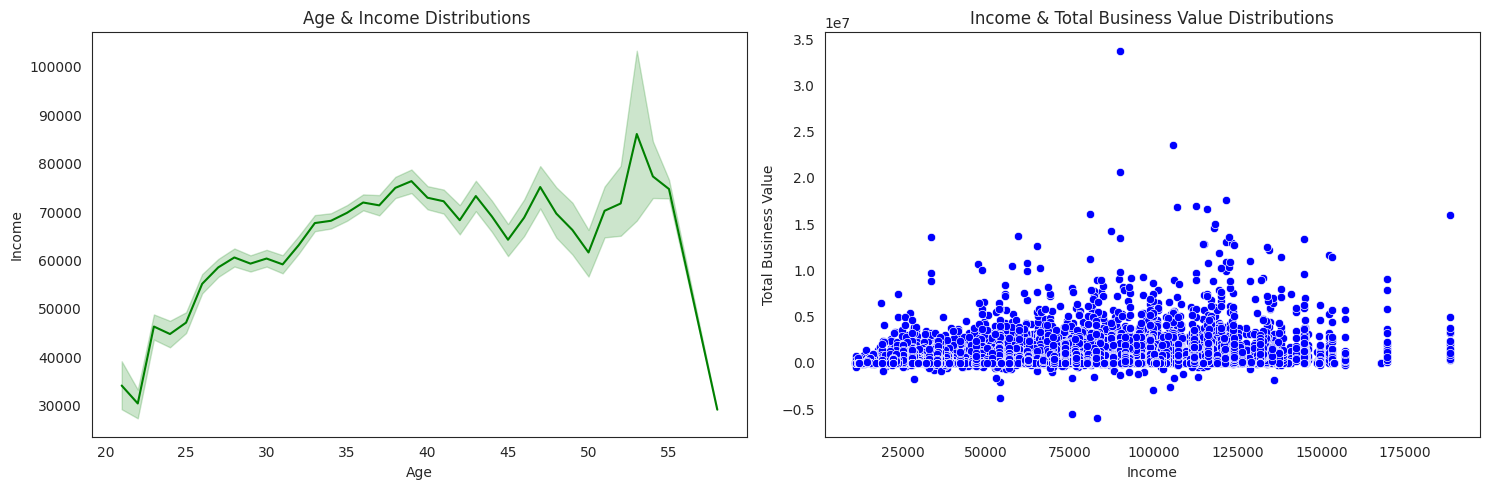

In [26]:
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.scatterplot(y=data['Total Business Value'],x=data['Income'],color='blue')
plt.title('Income & Total Business Value Distributions')
plt.subplot(1,2,1)
sns.lineplot(x=data['Age'],y=data['Income'],color='green')
plt.title('Age & Income Distributions ')
plt.tight_layout()
plt.show()


Question- How does Quarterly Rating vary across different drivers and time periods?

In [27]:
data.groupby(['Driver_ID','Date_of_joining'])['Quarterly Rating'].mean()

,,Quarterly Rating
Driver_ID,Date_of_joining,
1,2018-12-24,2.000000
2,2020-06-11,1.000000
4,2019-07-12,1.000000
5,2019-09-01,1.000000
6,2020-07-31,1.600000
...,...,...
2784,2015-10-15,2.625000
2785,2020-08-28,1.000000
2786,2018-07-31,1.666667


Question- Are there any trends or patterns in the monthly income or business value acquired?

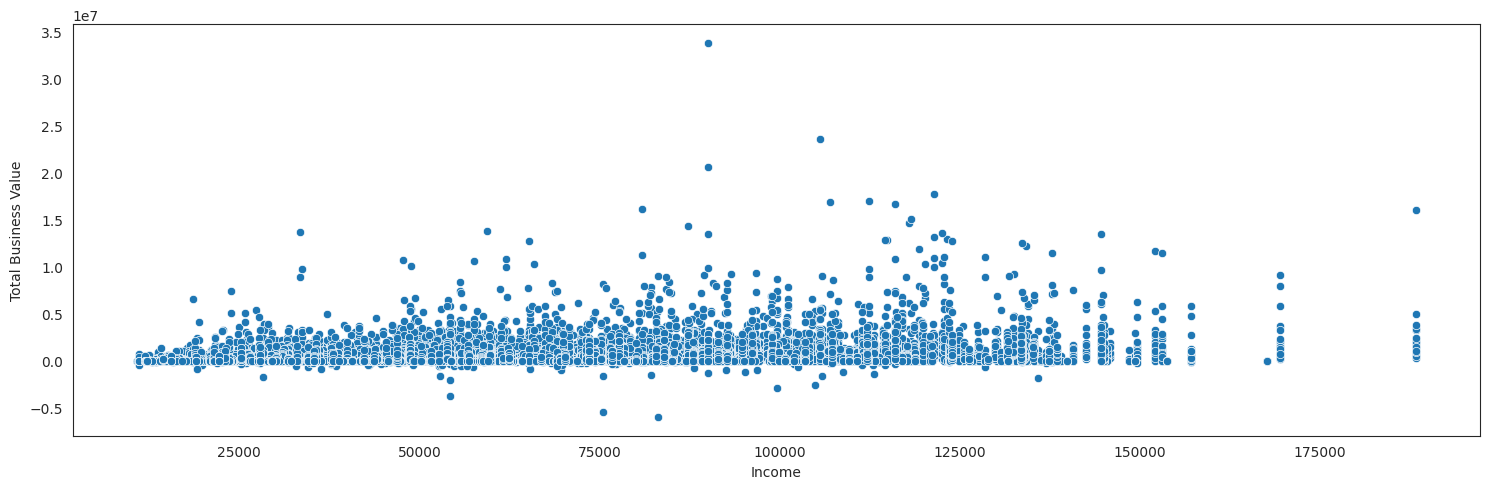

In [28]:
sns.set_style('white')
plt.figure(figsize=(15,5))
sns.scatterplot(x=data['Income'],y=data['Total Business Value'])
plt.tight_layout()
plt.show()

# 6.	Missing Values Handling:

Question- How should missing values in LastWorkingDate be treated, considering it indicates whether a driver has left?

In the Last_Working_date column, if a date is present, it indicates the date the driver left the OLA company. If the column contains NaT or null values, it means the driver is currently working with OLA. To represent this scenario, we initially considered using a string value like 'Currently Working'. However, this approach caused errors during calculations because string values cannot be used in date-based computations.

To solve this problem, we replace the null (NaT) values in the Last_Working_date column with the current date. This allows us to maintain a consistent datetime format in the column, enabling accurate calculations.

In [29]:
data['current_date'] = datetime.now()
data['Last_Working_date'].fillna(value=data['current_date'], inplace=True)

<ipython-input-29-067cea666cac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Last_Working_date'].fillna(value=data['current_date'], inplace=True)


In [30]:
data.Last_Working_date.head()

,Last_Working_date
0,2024-12-20 11:22:56.687448
1,2024-12-20 11:22:56.687448
2,2019-11-03 00:00:00.000000
3,2024-12-20 11:22:56.687448
4,2024-12-20 11:22:56.687448


Successfully handled missing values in the Last_Working_date column without causing errors during calculations.

# 7.	Correlation and Relationships:

Question- Is there a correlation between Age and Income?

In [31]:
correlation = data[['Income','Age']].corr()
correlation

,Income,Age
Income,1.000000,0.191112
Age,0.191112,1.000000


Based on the correlation coefficient of 0.19 between the Age and Income columns, there is a very weak correlation between Age and Income.

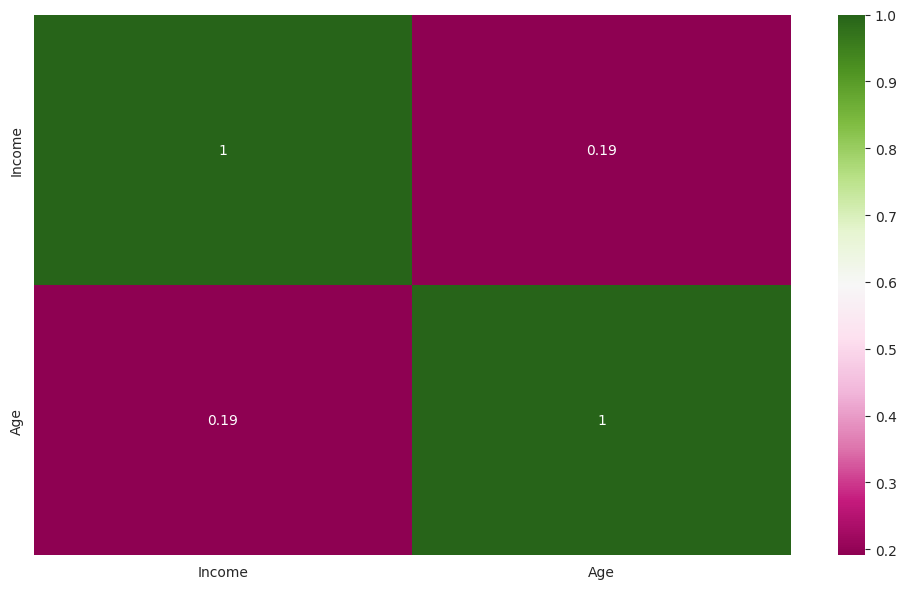

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='PiYG')
plt.tight_layout()
plt.show()


Question-	How do Education_Level and City affect Total Business Value?

In [33]:
new_matrix = data.pivot_table(index='City',columns='Education_Level',values='Total Business Value')
new_matrix

Education_Level,0,1,2
City,,,
C1,297247.248322,7.760189e+05,298041.776650
C10,443923.947368,5.180452e+05,652645.919118
C11,206695.294118,6.244235e+05,545338.322148
C12,865403.029046,6.952418e+05,404552.654028
C13,907502.597403,1.037106e+06,308525.646259
C14,750500.331754,2.318395e+05,754291.906615
C15,337449.935065,6.144575e+05,598953.214286
C16,524243.320611,7.583973e+05,589596.848485
C17,612280.000000,4.326699e+05,225343.464567


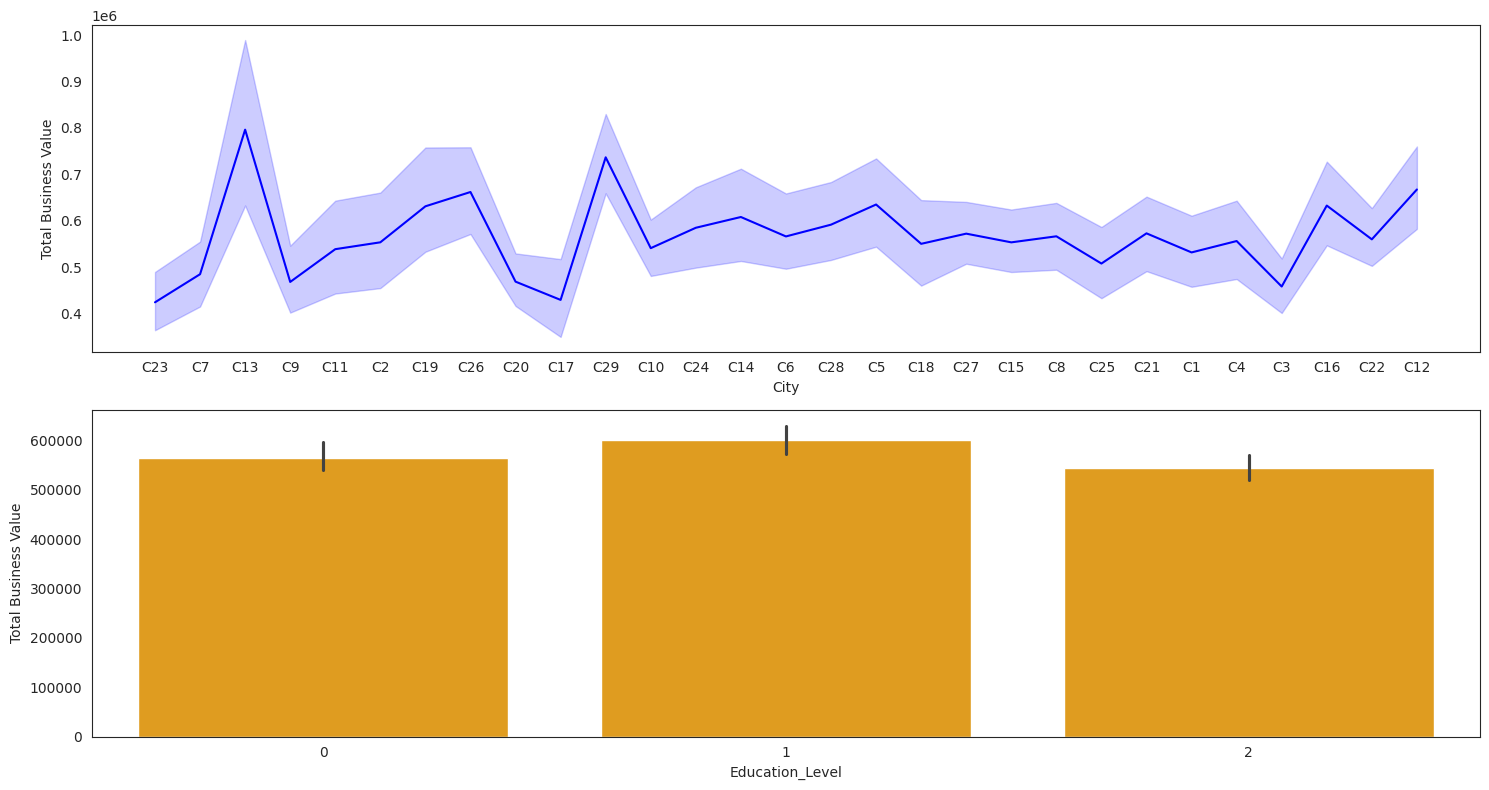

In [34]:
sns.set_style('white')
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.lineplot(x=data['City'],y=data['Total Business Value'],markers='o',color='blue')
plt.subplot(2,1,2)
sns.barplot(x=data['Education_Level'],y=data['Total Business Value'],color='orange')
plt.tight_layout()
plt.show()


Question- Are drivers with higher Quarterly Rating more likely to stay longer?

In [35]:
data[['Quarterly Rating','Duration_of_employee_in_day']]

,Quarterly Rating,Duration_of_employee_in_day
0,2,2188
1,2,2188
2,2,314
3,1,1653
4,1,1653
...,...,...
19099,3,1597
19100,3,1597
19101,2,1597
19102,2,1597


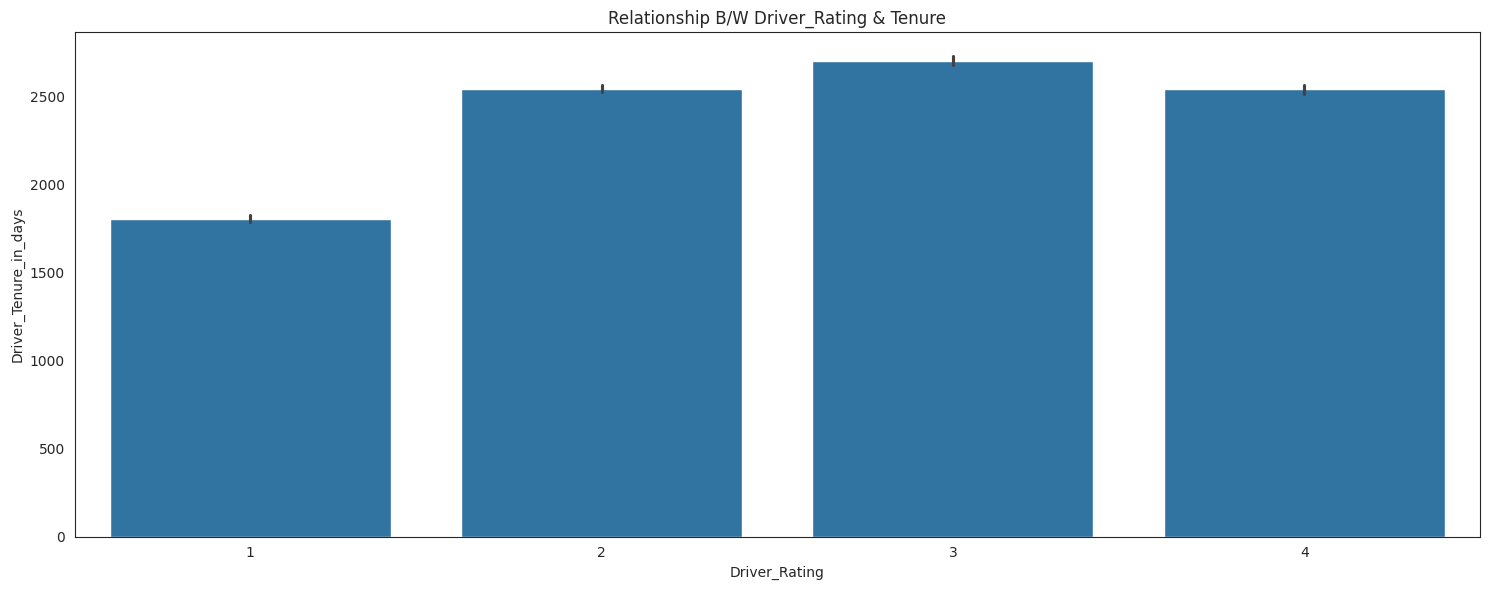

In [36]:
sns.set_style('white')
plt.figure(figsize=(15,6))
sns.barplot(x=data['Quarterly Rating'],y=data['Duration_of_employee_in_day'])
plt.xlabel('Driver_Rating')
plt.ylabel('Driver_Tenure_in_days')
plt.title('Relationship B/W Driver_Rating & Tenure')
plt.tight_layout()
plt.show()


# 8.	Predictive Analysis(Optional) :

Question- Can we predict which drivers are likely to leave based on their demographic and performance attributes?

Driver leave based on their demographic and performance

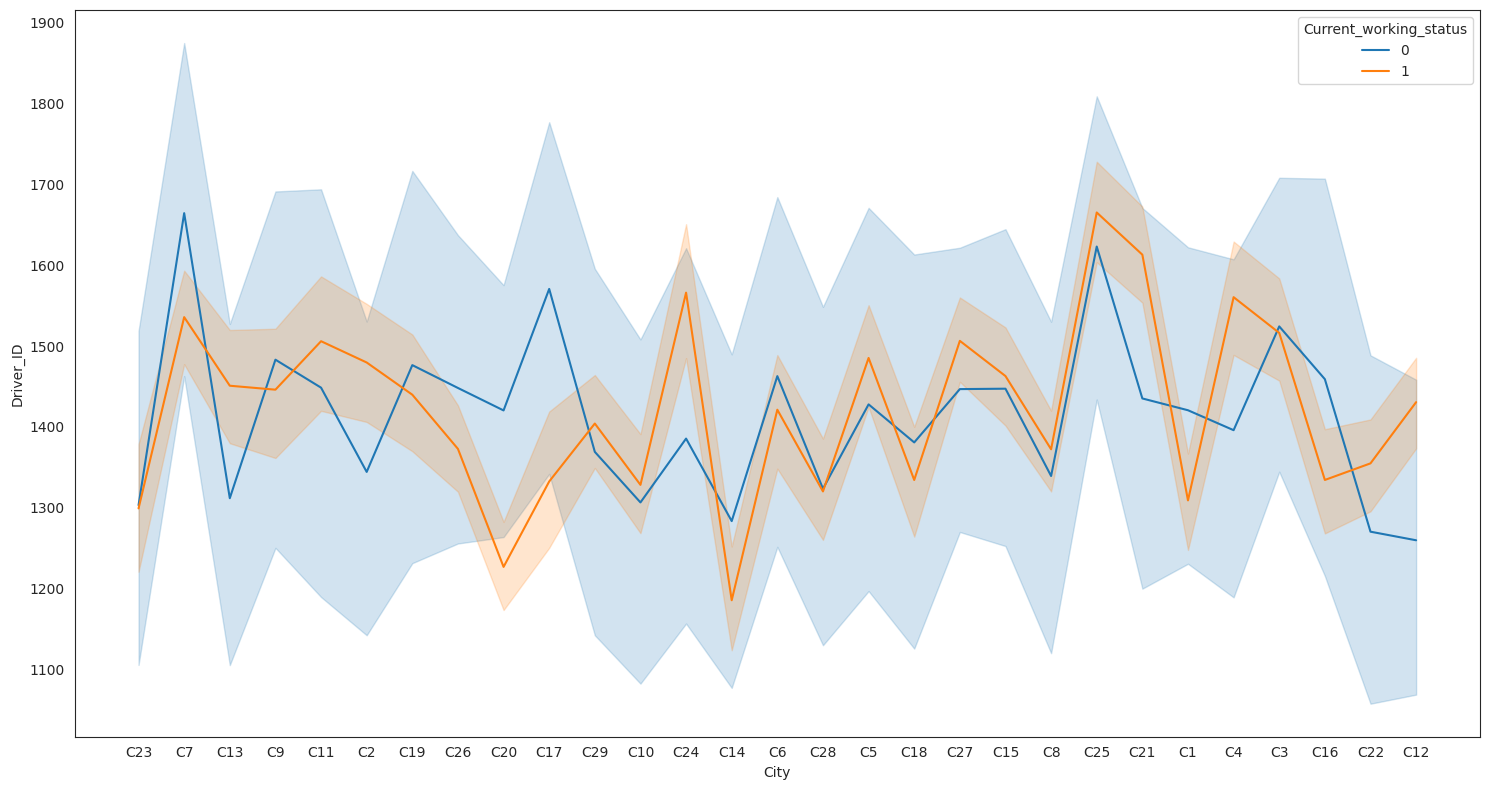

In [45]:
sns.set_style('white')
plt.figure(figsize=(15,8))
sns.lineplot(x=data['City'],y=data['Driver_ID'],hue=data['Current_working_status'],markers='o')
plt.tight_layout()
plt.show()


Driver leave based on their Grade


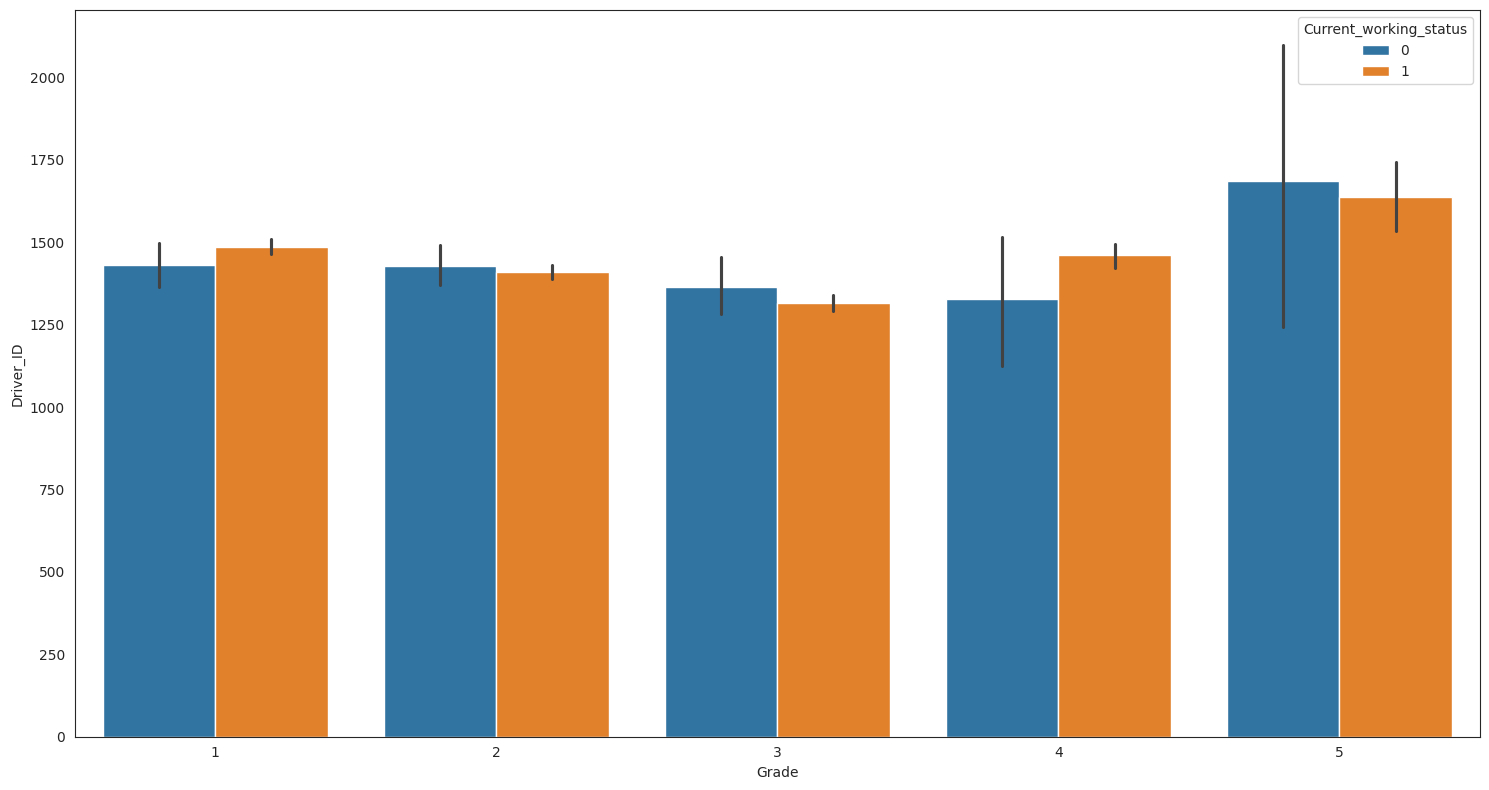

In [60]:
sns.set_style('white')
plt.figure(figsize=(15,8))
sns.barplot(x=data['Grade'],y=data['Driver_ID'],hue=data['Current_working_status'])
plt.tight_layout()
plt.show()


Driver leave based on Year Month


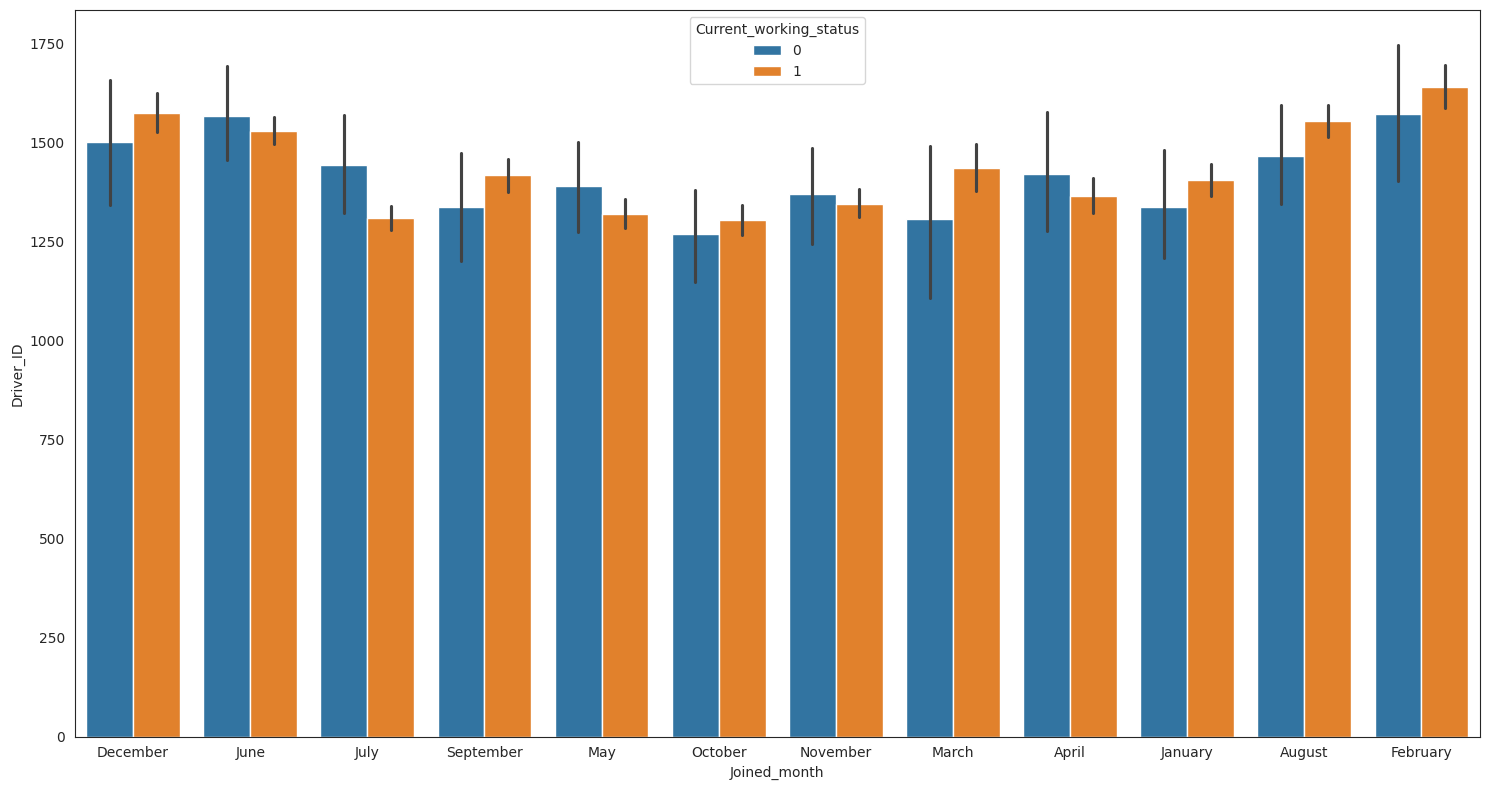

In [68]:
sns.set_style('white')
plt.figure(figsize=(15,8))
sns.barplot(x=data['Joined_month'],y=data['Driver_ID'],hue=data['Current_working_status'])
plt.tight_layout()
plt.show()

#Actionable Insights

•	Ola has a total of 2,381 unique drivers.

•	Driver attrition rate:
o	Monthly driver departures:
	January: 134, February: 137, March: 117, April: 126, May: 147
	June: 139, July: 183, August: 80, September: 150, October: 117
	November: 149, December: 137

•	Average tenure: Drivers work for approximately 370 days before leaving.

Driver Demographics and Income
•	Highest earning age group: Drivers aged 30-55 have the highest income.
•	High attrition age groups: Drivers aged 30-40 and 55+ exhibit the highest attrition rates.

•	Income range: Almost all drivers fall within an income range of ₹50,000-₹1,25,000.

Business Value Insights
•	Total business value range: Most drivers generate a total business value between ₹0-₹0.5.

•	Top cities by business value: Cities C13, C29, C5, C16, and C12 have the highest business value.
•	Lowest business value cities: Cities C9, C17, C25, and C3 have the lowest business value.

Correlations and Education
•	Age vs. Income correlation: A correlation coefficient of 0.19 suggests a very weak positive relationship between age and income.

•	Impact of education: Education level does not significantly affect total business value:
o	High School+, Intermediate+, and Graduate+ education levels all have a business value range of approximately ₹50,000-₹5,50,000.

Driver Ratings
•	Driver rating and work duration:
o	Drivers with a rating of 1 have the lowest participation in Ola.
o	Drivers with a rating of 3 are the most active.
o	Ratings of 2 and 4 show similar levels of participation.


#Recommendations

Recommendations to Improve Ola Driver Churn Rate

Focus on drivers aged 30-40 and 55+ since they have the highest leaving rates. Conduct surveys or exit interviews to understand their challenges and provide tailored solutions, such as:
Flexible working hours for older drivers.
Targeted incentives for drivers aged 30-40 to reduce attrition.
Enhance Driver Earnings Potential

Introduce performance-based incentives for drivers in the ₹50,000-₹1,25,000 income range to increase their business value.

Offer bonuses or commission boosts for drivers operating in low business value cities (C9, C17, C25, and C3) to motivate them.

Improve Retention Through Tenure-Based Rewards
Implement loyalty programs where drivers receive additional perks or incentives based on their tenure milestones (e.g., after 6 months, 1 year, etc.).

Support Drivers in High Attrition Months
Analyze operational factors leading to high attrition months like July, September, and November and introduce retention strategies during these periods:
Seasonal bonuses or reduced commission rates during these months.
Address work-life balance concerns that may contribute to higher departures.
Leverage Data Insights for Proactive Intervention

Use the correlation between age and income (weak but positive) to identify drivers at risk of attrition due to low income and offer targeted support programs.

Monitor drivers with low ratings (1) and provide them with training and support to improve performance and engagement.

Introduce Flexible Work Schedules
Provide part-time or flexible working options for drivers who may not be able to commit to full-time driving, especially those in the 55+ age group.
Enhance Driver Support and Engagement

Improve Driver Ratings
Offer workshops or training to help drivers improve their customer interaction skills and receive higher ratings, especially targeting drivers with ratings below 3.
Incentivize drivers with consistent high ratings to foster long-term commitment.
Focus on Low Business Value Cities

Develop city-specific strategies for C9, C17, C25, and C3 to boost demand and driver profitability in these areas. This can include:
Collaborating with local businesses to increase ride volumes.
Running city-specific marketing campaigns to attract riders.
Strengthen Onboarding and Early Career Support


Set up regular feedback mechanisms like surveys or driver town halls to understand their concerns and build a sense of belonging.
Provide better support during peak demand times, ensuring drivers do not feel overworked.